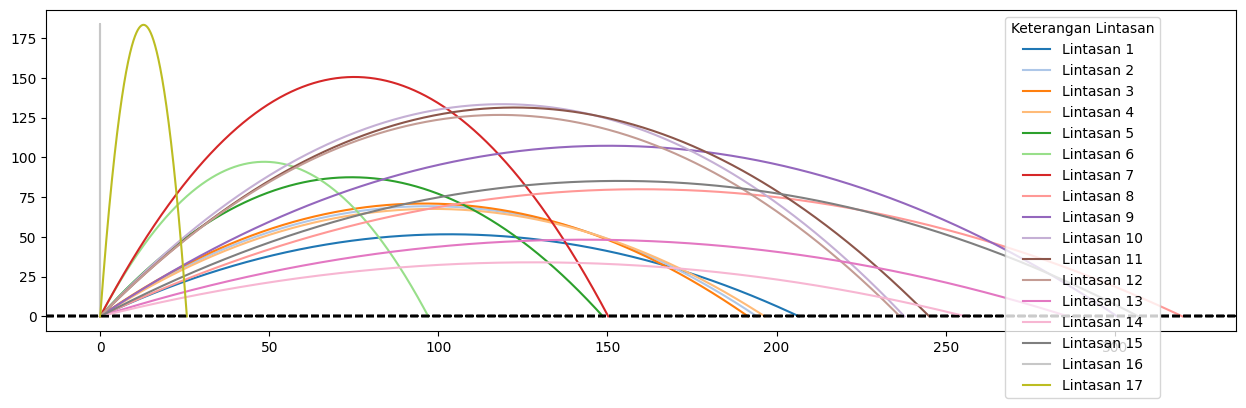

In [11]:
import tkinter as tk
from tkinter import Label, Entry, Button, messagebox, filedialog, scrolledtext
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np

# Menghitung jumlah lintasan yang sudah ditampilkan
lintasan_counter = 0

# Create a single figure and axis
fig, ax = plt.subplots()

def color_generator(num_colors):
    # Generate a list of distinct colors
    cmap = plt.get_cmap('tab20')
    return [cmap(i) for i in np.linspace(0, 1, num_colors)]

# Generate 20 distinct colors
lintasan_colors = color_generator(20)

def hitung_dan_tampilkan_grafik():
    global lintasan_counter

    try:
        # Mendapatkan input dari pengguna
        kecepatan_awal = float(entry_kecepatan.get())
        sudut_elevasi = float(entry_elevasi.get())

        # Menghitung waktu total
        jarak = (2 * kecepatan_awal * np.sin(np.radians(sudut_elevasi))) / 9.8

        # Menghitung posisi bola pada setiap waktu
        posisi_detik_ke = np.linspace(0, jarak, num=1000)
        posisi_x = kecepatan_awal * np.cos(np.radians(sudut_elevasi)) * posisi_detik_ke
        posisi_y = kecepatan_awal * np.sin(np.radians(sudut_elevasi)) * posisi_detik_ke - 0.5 * 9.8 * posisi_detik_ke**2

        # Menampilkan proses perhitungan dan hasilnya di output
        hasil.config(state=tk.NORMAL)
        hasil.delete("1.0", tk.END)  # Menghapus isi sebelumnya
        hasil.insert(tk.END, f"Waktu total: {jarak:.2f} detik\n")
        hasil.insert(tk.END, "Waktu\t\tPosisi (x, y)\n")
        hasil.insert(tk.END, "----------------------------------------\n")
        for t, x, y in zip(posisi_detik_ke, posisi_x, posisi_y):
            hasil.insert(tk.END, f"{t:.2f} detik\t\t({x:.2f}, {y:.2f})\n")
        hasil.config(state=tk.DISABLED)

        # Menampilkan grafik dengan warna lintasan yang berbeda
        if lintasan_counter < 20:
            color = lintasan_colors[lintasan_counter]

            ax.plot(posisi_x, posisi_y, label=f'Lintasan {lintasan_counter + 1}', color=color)

            # Increment counter lintasan
            lintasan_counter += 1

        else:
            messagebox.showwarning("Batas Lintasan", "Anda hanya dapat menambahkan maksimal 20 lintasan pada grafik.")

        # Menampilkan garis horizontal pada ketinggian 0 meter
        ax.axhline(0, color='k', linestyle='--')

        # Display the legend with the colors of the trajectories inside the plot
        ax.legend(loc='upper left', bbox_to_anchor=(0.8, 1), title="Keterangan Lintasan")

        # Update the Tkinter window
        canvas.draw()

    except ValueError:
        messagebox.showerror("Error", "Masukkan angka yang valid untuk kecepatan awal dan elevasi")

def simpan_hasil_ke_file():
    try:
        file_path = filedialog.asksaveasfilename(defaultextension=".txt", filetypes=[("Text files", "*.txt")])
        if file_path:
            with open(file_path, 'w') as file:
                file.write(hasil.get("1.0", tk.END))
            messagebox.showinfo("Informasi", "Hasil berhasil disimpan ke dalam.")

    except Exception as e:
        messagebox.showerror("Error", f"Terjadi kesalahan saat menyimpan hasil: {str(e)}")

# Membuat GUI
root = tk.Tk()
root.title("Simulasi Gerak Parabola Bola")

# Label dan Entry untuk kecepatan awal
label_kecepatan = Label(root, text="Kecepatan Awal (m/s):")
label_kecepatan.pack()
entry_kecepatan = Entry(root)
entry_kecepatan.pack()

# Label dan Entry untuk elevasi
label_elevasi = Label(root, text="Elevasi (derajat):")
label_elevasi.pack()
entry_elevasi = Entry(root)
entry_elevasi.pack()

# Tombol untuk menghitung dan menampilkan grafik
tombol_hitung = Button(root, text="Hitung dan Tampilkan Grafik", command=hitung_dan_tampilkan_grafik)
tombol_hitung.pack()

# Tombol untuk menyimpan hasil ke file
tombol_simpan = Button(root, text="Simpan Hasil", command=simpan_hasil_ke_file)
tombol_simpan.pack()

# Output teks dengan fitur scroll
hasil = scrolledtext.ScrolledText(root, height=15, width=50, state=tk.DISABLED)
hasil.pack()

# Create the canvas
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(fill=tk.BOTH)

# Menjalankan loop utama GUI
root.mainloop()
